In [7]:
import numpy as np
import pickle
import cv2
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage.feature import hog
%matplotlib inline

#read in all car and non-car images
car_list = glob.glob("./vehicles/**/*.png")
noncar_list = glob.glob("./non-vehicles/**/*.png")
car_img = mpimg.imread(car_list[1000])
noncar_img = mpimg.imread(noncar_list[1000])

car_YCrCb=cv2.cvtColor(car_img, cv2.COLOR_RGB2YCrCb)
car_CH1=car_YCrCb[:,:,0]
car_CH2=car_YCrCb[:,:,1]
car_CH3=car_YCrCb[:,:,2]
car_CH1_feat=cv2.resize(car_YCrCb[:,:,0],(32,32)) 
car_CH2_feat=cv2.resize(car_YCrCb[:,:,1],(32,32))
car_CH3_feat=cv2.resize(car_YCrCb[:,:,2],(32,32))

noncar_YCrCb=cv2.cvtColor(noncar_img, cv2.COLOR_RGB2YCrCb)
noncar_CH1=noncar_YCrCb[:,:,0]
noncar_CH2=noncar_YCrCb[:,:,1]
noncar_CH3=noncar_YCrCb[:,:,2]
noncar_CH1_feat=cv2.resize(noncar_YCrCb[:,:,0],(32,32)) 
noncar_CH2_feat=cv2.resize(noncar_YCrCb[:,:,1],(32,32))
noncar_CH3_feat=cv2.resize(noncar_YCrCb[:,:,2],(32,32))

def get_hog_features(img,orient=9,pixels=8,cells=2,vis=True,feature_vec=True):   
    if vis:
        hog_features,hog_img = hog(img,orientations=orient,pixels_per_cell=(pixels,pixels),cells_per_block=(cells,cells),visualise=vis,transform_sqrt=True,feature_vector=feature_vec)
        return hog_features, hog_img
    else:
        hog_features = hog(img,orientations=orient,pixels_per_cell=(pixels,pixels),cells_per_block=(cells,cells),visualise=vis,transform_sqrt=True,feature_vector=feature_vec)
        return hog_features
  
car_hog_ch1feat,car_hog_ch1img = get_hog_features(car_CH1,orient=8,pixels=8,cells=2,vis=True,feature_vec=False)
car_hog_ch2feat,car_hog_ch2img = get_hog_features(car_CH2,orient=8,pixels=8,cells=2,vis=True,feature_vec=False)
car_hog_ch3feat,car_hog_ch3img = get_hog_features(car_CH3,orient=8,pixels=8,cells=2,vis=True,feature_vec=False)

noncar_hog_ch1feat,noncar_hog_ch1img = get_hog_features(noncar_CH1,orient=8,pixels=8,cells=2,vis=True,feature_vec=False)
noncar_hog_ch2feat,noncar_hog_ch2img = get_hog_features(noncar_CH2,orient=8,pixels=8,cells=2,vis=True,feature_vec=False)
noncar_hog_ch3feat,noncar_hog_ch3img = get_hog_features(noncar_CH3,orient=8,pixels=8,cells=2,vis=True,feature_vec=False)

def bin_spatial(img, size=(32,32)):
    return cv2.resize(img, size).ravel()
    
def color_hist(img, nbins=32, bins_range=(0,256)):
    ch1_hist=np.histogram(img[:,:,0], bins=nbins, range=bins_range)
    ch2_hist=np.histogram(img[:,:,1], bins=nbins, range=bins_range)
    ch3_hist=np.histogram(img[:,:,2], bins=nbins, range=bins_range)
    hist_features = np.concatenate((ch1_hist[0],ch2_hist[0],ch3_hist[0]))
    return hist_features
'''
f, (ax5,ax6,ax7,ax8) = plt.subplots(1, 4, figsize=(20,10))
ax1.imshow(car_CH1,cmap='gray')
ax1.set_title('Car CH-1', fontsize=30)
ax2.imshow(car_hog_ch1img,cmap='gray')
ax2.set_title('Car CH-1 HOG', fontsize=30)
ax3.imshow(noncar_CH1,cmap='gray')
ax3.set_title('NonCar CH-1', fontsize=30)
ax4.imshow(noncar_hog_ch1img,cmap='gray')
ax4.set_title('Noncar CH1 HOG', fontsize=30)

ax5.imshow(car_CH3,cmap='gray')
ax5.set_title('Car CH-3', fontsize=30)
ax6.imshow(car_CH3_feat,cmap='gray')
ax6.set_title('Car CH-3 Feature', fontsize=30)
ax7.imshow(noncar_CH3,cmap='gray')
ax7.set_title('NonCar CH-3', fontsize=30)
ax8.imshow(noncar_CH3_feat,cmap='gray')
ax8.set_title('NonCar CH-3 Feature', fontsize=30)

ax9.imshow(car_CH2,cmap='gray')
ax9.set_title('Car CH-2', fontsize=30)
ax10.imshow(car_CH2_feat,cmap='gray')
ax10.set_title('Car CH-2 Feature', fontsize=30)
ax11.imshow(noncar_CH2,cmap='gray')
ax11.set_title('NonCar CH-2', fontsize=30)
ax12.imshow(noncar_CH2_feat,cmap='gray')
ax12.set_title('NonCar CH-2 Feature', fontsize=30)

ax13.imshow(car_CH3,cmap='gray')
ax13.set_title('Car CH-3', fontsize=30)
ax14.imshow(car_CH3_feat,cmap='gray')
ax14.set_title('Car CH-3 Feature', fontsize=30)
ax15.imshow(noncar_CH3,cmap='gray')
ax15.set_title('NonCar CH-3', fontsize=30)
ax16.imshow(noncar_CH3_feat,cmap='gray')
ax16.set_title('NonCar CH-3 Feature', fontsize=30)
fig = plt.figure()
plt.subplot(231)
plt.imshow(car_hog_ch1img, cmap='gray')
plt.title('Car HOG Ch1',fontsize=4)
plt.subplot(232)
plt.imshow(car_hog_ch2img, cmap='gray')
plt.title('Car HOG Ch2',fontsize=4)
plt.subplot(233)
plt.imshow(car_hog_ch3img, cmap='gray')
plt.title('Car HOG Ch3',fontsize=4)
plt.subplot(234)
plt.imshow(noncar_hog_ch1img, cmap='gray')
plt.title('NCar HOG Ch1',fontsize=4)
plt.subplot(235)
plt.imshow(noncar_hog_ch2img, cmap='gray')
plt.title('NCar HOG Ch2',fontsize=4)
plt.subplot(236)
plt.imshow(noncar_hog_ch3img, cmap='gray')
plt.title('NCar HOG Ch3',fontsize=4)
'''

/Users/wuhao/anaconda/lib/python3.6/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


"\nf, (ax5,ax6,ax7,ax8) = plt.subplots(1, 4, figsize=(20,10))\nax1.imshow(car_CH1,cmap='gray')\nax1.set_title('Car CH-1', fontsize=30)\nax2.imshow(car_hog_ch1img,cmap='gray')\nax2.set_title('Car CH-1 HOG', fontsize=30)\nax3.imshow(noncar_CH1,cmap='gray')\nax3.set_title('NonCar CH-1', fontsize=30)\nax4.imshow(noncar_hog_ch1img,cmap='gray')\nax4.set_title('Noncar CH1 HOG', fontsize=30)\n\nax5.imshow(car_CH3,cmap='gray')\nax5.set_title('Car CH-3', fontsize=30)\nax6.imshow(car_CH3_feat,cmap='gray')\nax6.set_title('Car CH-3 Feature', fontsize=30)\nax7.imshow(noncar_CH3,cmap='gray')\nax7.set_title('NonCar CH-3', fontsize=30)\nax8.imshow(noncar_CH3_feat,cmap='gray')\nax8.set_title('NonCar CH-3 Feature', fontsize=30)\n\nax9.imshow(car_CH2,cmap='gray')\nax9.set_title('Car CH-2', fontsize=30)\nax10.imshow(car_CH2_feat,cmap='gray')\nax10.set_title('Car CH-2 Feature', fontsize=30)\nax11.imshow(noncar_CH2,cmap='gray')\nax11.set_title('NonCar CH-2', fontsize=30)\nax12.imshow(noncar_CH2_feat,cmap='gr

In [8]:
def extract_features(images_flist, color_space='RGB',spatial_size=(32,32),hist_bins=32, orient=8,pix_per_cell=8,cell_per_block=2,hog_channel=0,spatial_feat=True,hist_feat=True,hog_feat=True):
    features=[]
    for filename in images_flist:
        file_features = []
        img = mpimg.imread(filename)
        if color_space!='RGB':
            if color_space=='HSV':
                feature_image=cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
            elif color_space=='LUV':
                feature_image=cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
            elif color_space=='HLS':
                feature_image=cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
            elif color_space=='YUV':
                feature_image=cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
            elif color_space=='YCrCb':
                feature_image=cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
            else:
                print("Please input color space you want to transform to.")
        else:
            feature_image=np.copy(img)
        
        if spatial_feat==True:
            spatial_feature = bin_spatial(feature_image,size=spatial_size)
            file_features.append(spatial_feature)
        
        if hist_feat==True:
            color_feature = color_hist(feature_image, nbins=hist_bins)
            file_features.append(color_feature)
        
        if hog_feat==True:
            if hog_channel=='ALL':
                hog_feature=[]
                for channel in range(feature_image.shape[2]):
                    hog_feature.extend(get_hog_features(feature_image[:,:,channel],orient,pix_per_cell,cell_per_block, vis=False,feature_vec=True))
            else:                
                hog_feature=get_hog_features(feature_image,orient,pix_per_cell,cell_per_block, vis=False,feature_vec=True)
            file_features.append(hog_feature)
        features.append(np.concatenate(file_features))
    return features
car_feat = extract_features(car_list,color_space='YCrCb',spatial_size=(32,32),hist_bins=32,orient=8,pix_per_cell=8,cell_per_block=2,hog_channel='ALL',spatial_feat=True,hist_feat=True,hog_feat=True)
noncar_feat = extract_features(noncar_list,color_space='YCrCb',spatial_size=(32,32),hist_bins=32,orient=8,pix_per_cell=8,cell_per_block=2,hog_channel='ALL',spatial_feat=True,hist_feat=True,hog_feat=True)
features = np.vstack((car_feat,noncar_feat)).astype(np.float64)
labels = np.hstack((np.ones(len(car_list)),np.zeros(len(noncar_list))))

/Users/wuhao/anaconda/lib/python3.6/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


In [9]:
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC                        
features, labels=shuffle(features,labels)
# Fit a per-column scaler
feat_scaler = StandardScaler().fit(features)
# Apply the scaler to X
scaled_features = feat_scaler.transform(features)

rand_state = np.random.randint(0, 100)
train_X,test_X,train_y,test_y = train_test_split(scaled_features,labels,test_size=0.2,random_state=rand_state)
print(train_X.shape)
print(test_X.shape)
print(train_y.shape)
print(test_y.shape)
#parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = LinearSVC(C=1.2)
#clf = GridSearchCV(svr, parameters)
svc.fit(train_X,train_y)
print('Test Accuracy of SVC = ', svc.score(test_X, test_y))
data={'scaler':feat_scaler,'clf':svc}
#with open("data.pickle",'wb') as f:
    #pickle.dump(data,f)

(14208, 7872)
(3552, 7872)
(14208,)
(3552,)
Test Accuracy of SVC =  0.989583333333


In [ ]:
def slide_window(img,x_start_stop=[None,None],y_start_stop=[None,None],xy_window=(64,64),xy_overlap=(0.5,0.5)):
    if x_start_stop[0]==None:
        x_start_stop[0]=0
    if x_start_stop[1]==None:
        x_start_stop[1]=img.shape[1]
    if y_start_stop[0]==None:
        y_start_stop[0]=0
    if y_start_stop[1]==None:
        y_start_stop[1]=img.shape[0]
    xspan=x_start_stop[1]-x_start_stop[0]
    yspan=y_start_stop[1]-y_start_stop[0]
    nx_pix_per_step = np.int(xy_window[0]*(1 - xy_overlap[0]))
    ny_pix_per_step = np.int(xy_window[1]*(1 - xy_overlap[1]))
    # Compute the number of windows in x/y
    nx_buffer = np.int(xy_window[0]*(xy_overlap[0]))
    ny_buffer = np.int(xy_window[1]*(xy_overlap[1]))
    nx_windows = np.int((xspan-nx_buffer)/nx_pix_per_step) 
    ny_windows = np.int((yspan-ny_buffer)/ny_pix_per_step) 
    window_list=[]
    for ny in range(ny_windows):
        for nx in range(nx_windows):
            x_start = x_start_stop[0]+nx*nx_pix_per_step
            y_start = y_start_stop[0]+ny*ny_pix_per_step
            x_end = x_start+xy_window[0]
            y_end = y_start+xy_window[1]
            window_list.append(((x_start,y_start),(x_end,y_end)))
    return window_list
x_min_win_size=128
y_min_win_size=64
x_overlap=0.25
y_overlap=0.5
windows=[]
for i in range(4):
    print(i)
    windows.extend(slide_window(test_img,x_start_stop=[None,None],y_start_stop=[np.int(test_img.shape[0]/2),np.int(test_img.shape[0])],xy_window=(x_min_win_size+i*128,y_min_win_size+i*64),xy_overlap=(x_overlap,y_overlap)))
print(len(windows))
print(windows[0])
test_cpimg=draw_boxes(test_img,windows)
#plt.imsave('./output_images/sliding_windows.jpg',test_cpimg)
plt.imshow(test_cpimg)

In [42]:
# Define a function to extract features from a single image window
# This function is very similar to extract_features()
# just for a single image rather than list of images
def single_img_features(img, color_space='RGB', spatial_size=(32, 32),
                        hist_bins=32, orient=9, 
                        pix_per_cell=8, cell_per_block=2, hog_channel=0,
                        spatial_feat=True, hist_feat=True, hog_feat=True):    
    #1) Define an empty list to receive features
    img_features = []
    #2) Apply color conversion if other than 'RGB'
    if color_space != 'RGB':
        if color_space == 'HSV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
        elif color_space == 'LUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
        elif color_space == 'HLS':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
        elif color_space == 'YUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
        elif color_space == 'YCrCb':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    else: feature_image = np.copy(img)      
    #3) Compute spatial features if flag is set
    if spatial_feat == True:
        spatial_features = bin_spatial(feature_image, size=spatial_size)
        #4) Append features to list
        img_features.append(spatial_features)
    #5) Compute histogram features if flag is set
    if hist_feat == True:
        hist_features = color_hist(feature_image, nbins=hist_bins)
        #6) Append features to list
        img_features.append(hist_features)
    #7) Compute HOG features if flag is set
    if hog_feat == True:
        if hog_channel == 'ALL':
            hog_features = []
            for channel in range(feature_image.shape[2]):
                hog_features.extend(get_hog_features(feature_image[:,:,channel], 
                                    orient, pix_per_cell, cell_per_block, 
                                    vis=False, feature_vec=True))      
        else:
            hog_features = get_hog_features(feature_image[:,:,hog_channel], orient, 
                        pix_per_cell, cell_per_block, vis=False, feature_vec=True)
        #8) Append features to list
        img_features.append(hog_features)

    #9) Return concatenated array of features
    return np.concatenate(img_features)

In [43]:
# Define a function you will pass an image 
# and the list of windows to be searched (output of slide_windows())
def search_windows(img, windows, clf, scaler, color_space='RGB', 
                    spatial_size=(32, 32), hist_bins=32, 
                    hist_range=(0, 256), orient=9, 
                    pix_per_cell=8, cell_per_block=2, 
                    hog_channel=0, spatial_feat=True, 
                    hist_feat=True, hog_feat=True):

    #1) Create an empty list to receive positive detection windows
    on_windows = []
    #2) Iterate over all windows in the list
    for window in windows:
        #3) Extract the test window from original image
        test_img = cv2.resize(img[window[0][1]:window[1][1], window[0][0]:window[1][0]], (64, 64))      
        #4) Extract features for that window using single_img_features()
        features = single_img_features(test_img, color_space=color_space, 
                            spatial_size=spatial_size, hist_bins=hist_bins, 
                            orient=orient, pix_per_cell=pix_per_cell, 
                            cell_per_block=cell_per_block, 
                            hog_channel=hog_channel, spatial_feat=spatial_feat, 
                            hist_feat=hist_feat, hog_feat=hog_feat)
        #print(features.shape)
        #5) Scale extracted features to be fed to classifier
        test_features = scaler.transform(np.array(features).reshape(1, -1))
        #6) Predict using your classifier
        prediction = clf.predict(test_features)
        #7) If positive (prediction == 1) then save the window
        if prediction == 1:
            on_windows.append(window)
    #8) Return windows for positive detections
    return on_windows

bound_boxes=search_windows(test_img, windows, clf=svc, scaler=feat_scaler, color_space='YCrCb', 
                    spatial_size=(32, 32), hist_bins=32, 
                    hist_range=(0, 256), orient=8, 
                    pix_per_cell=8, cell_per_block=2, 
                    hog_channel='ALL', spatial_feat=True, 
                    hist_feat=True, hog_feat=True)

/Users/wuhao/anaconda/lib/python3.6/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


In [7]:
import numpy as np
import pickle
import cv2
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage.feature import hog
%matplotlib inline

with open('data.pickle','rb') as f:
    data=pickle.load(f)
svc=data['clf']
feat_scaler=data['scaler']

test_img_list=[]
for i in range(6):
    test_img_list.append(mpimg.imread('./output_images/test_images/frames_00'+str(i+1)+'.jpg'))

In [8]:
def get_hog_features(img,orient=9,pixels=8,cells=2,vis=True,feature_vec=True):   
    if vis:
        hog_features,hog_img = hog(img,orientations=orient,pixels_per_cell=(pixels,pixels),cells_per_block=(cells,cells),visualise=vis,transform_sqrt=True,feature_vector=feature_vec)
        return hog_features, hog_img
    else:
        hog_features = hog(img,orientations=orient,pixels_per_cell=(pixels,pixels),cells_per_block=(cells,cells),visualise=vis,transform_sqrt=True,feature_vector=feature_vec)
        return hog_features

def bin_spatial(img, size=(32,32)):
    return cv2.resize(img, size).ravel()
    
def color_hist(img, nbins=32, bins_range=(0,256)):
    ch1_hist=np.histogram(img[:,:,0], bins=nbins, range=bins_range)
    ch2_hist=np.histogram(img[:,:,1], bins=nbins, range=bins_range)
    ch3_hist=np.histogram(img[:,:,2], bins=nbins, range=bins_range)
    hist_features = np.concatenate((ch1_hist[0],ch2_hist[0],ch3_hist[0]))
    return hist_features

def draw_boxes(img, bboxes, color=(0,0,255),thick=6):
    img_copy=np.copy(img)
    for bbox in bboxes:
        cv2.rectangle(img_copy,bbox[0],bbox[1],color,thick)
    return img_copy

In [9]:
def convert_color(img, conv='RGB2YCrCb'):
    if conv == 'RGB2YCrCb':
        return cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    if conv == 'BGR2YCrCb':
        return cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
    if conv == 'RGB2LUV':
        return cv2.cvtColor(img, cv2.COLOR_RGB2LUV)

# Define a single function that can extract features using hog sub-sampling and make predictions
def find_cars(img, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins):
    car_bboxes=[]
    draw_img = np.copy(img)
    img = img.astype(np.float32)/255
    
    img_tosearch = img[ystart:ystop,:,:]
    ctrans_tosearch = convert_color(img_tosearch, conv='RGB2YCrCb')
    if scale != 1:
        imshape = ctrans_tosearch.shape
        ctrans_tosearch = cv2.resize(ctrans_tosearch, (np.int(imshape[1]/scale), np.int(imshape[0]/scale)))
        
    ch1 = ctrans_tosearch[:,:,0]
    ch2 = ctrans_tosearch[:,:,1]
    ch3 = ctrans_tosearch[:,:,2]

    # Define blocks and steps as above
    nxblocks = (ch1.shape[1] // pix_per_cell) - cell_per_block + 1
    nyblocks = (ch1.shape[0] // pix_per_cell) - cell_per_block + 1 
    nfeat_per_block = orient*cell_per_block**2
    
    # 64 was the orginal sampling rate, with 8 cells and 8 pix per cell
    window = 64
    nblocks_per_window = (window // pix_per_cell) - cell_per_block + 1
    cells_per_step = 2  # Instead of overlap, define how many cells to step
    nxsteps = (nxblocks - nblocks_per_window) // cells_per_step
    nysteps = (nyblocks - nblocks_per_window) // cells_per_step
    
    # Compute individual channel HOG features for the entire image
    hog1 = get_hog_features(ch1, orient, pix_per_cell, cell_per_block, vis=False,feature_vec=False)
    hog2 = get_hog_features(ch2, orient, pix_per_cell, cell_per_block, vis=False,feature_vec=False)
    hog3 = get_hog_features(ch3, orient, pix_per_cell, cell_per_block, vis=False,feature_vec=False)

    for xb in range(nxsteps):
        for yb in range(nysteps):
            ypos = yb*cells_per_step
            xpos = xb*cells_per_step
            # Extract HOG for this patch
            hog_feat1 = hog1[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_feat2 = hog2[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_feat3 = hog3[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_features = np.hstack((hog_feat1, hog_feat2, hog_feat3))

            xleft = xpos*pix_per_cell
            ytop = ypos*pix_per_cell

            # Extract the image patch
            subimg = cv2.resize(ctrans_tosearch[ytop:ytop+window, xleft:xleft+window], (64,64))
          
            # Get color features
            spatial_features = bin_spatial(subimg, size=spatial_size)
            hist_features = color_hist(subimg, nbins=hist_bins)

            # Scale features and make a prediction
            test_features = X_scaler.transform(np.hstack((spatial_features, hist_features, hog_features)).reshape(1, -1))    
            #test_features = X_scaler.transform(np.hstack((shape_feat, hist_feat)).reshape(1, -1))    
            test_prediction = svc.predict(test_features)
            
            if test_prediction == 1:
                xbox_left = np.int(xleft*scale)
                ytop_draw = np.int(ytop*scale)
                win_draw = np.int(window*scale)
                cv2.rectangle(draw_img,(xbox_left, ytop_draw+ystart),(xbox_left+win_draw,ytop_draw+win_draw+ystart),(0,0,255),6) 
                car_bboxes.append(((xbox_left, ytop_draw+ystart),(xbox_left+win_draw,ytop_draw+win_draw+ystart)))
    return draw_img, car_bboxes

In [19]:
height=test_img_list[0].shape[0]
scale_img_list=[]
total_bboxes_list=[]
for i in range(6):
    bbox_list=[]
    for scale in range(2):
        result,car_bound_boxes=find_cars(test_img_list[i], ystart=int(height/2), ystop=height, scale=1.5+0.3*scale, svc=svc, X_scaler=feat_scaler, orient=8, pix_per_cell=8, cell_per_block=2, spatial_size=(32,32), hist_bins=32)
        scale_img_list.append(result)
        bbox_list.extend(car_bound_boxes)
        print(len(bbox_list))
    total_bboxes_list.append(bbox_list)

5
7
7
9
9
18
10
18
7
12
5
7
6


In [79]:
integrated_scale_img_list=[]
for i in range(len(total_bboxes_list)):
    integrated_scale_img_list.append(draw_boxes(test_img_list[i],total_bboxes_list[i]))
    mpimg.imsave('./test_images/scale162_test'+str(i+1)+'.jpg',integrated_scale_img_list[i])

In [34]:
from scipy.ndimage.measurements import label

def add_heat(heatmap, bbox_list):
    # Iterate through list of bboxes
    for box in bbox_list:
        # Add += 1 for all pixels inside each bbox
        # Assuming each "box" takes the form ((x1, y1), (x2, y2))
        if box!=[]:
            heatmap[box[0][1]:box[1][1], box[0][0]:box[1][0]] += 1
    # Return updated heatmap
    return heatmap# Iterate through list of bboxes
    
def apply_threshold(heatmap, threshold):
    # Zero out pixels below the threshold
    heatmap[heatmap < threshold] = 0
    # Return thresholded map
    return heatmap

def draw_labeled_bboxes(img, labels):
    # Iterate through all detected cars
    for car_number in range(1, labels[1]+1):
        # Find pixels with each car_number label value
        nonzero = (labels[0] == car_number).nonzero()
        # Identify x and y values of those pixels
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        # Define a bounding box based on min/max x and y
        bbox = ((np.min(nonzerox), np.min(nonzeroy)), (np.max(nonzerox), np.max(nonzeroy)))
        # Draw the box on the image
        cv2.rectangle(img, bbox[0], bbox[1], (0,0,255), 6)
    # Return the image
    return img

In [17]:
draw_img_list=[]
heatmap_list=[]
labels_list=[]
for i in range(6):
    heat = np.zeros_like(test_img_list[i][:,:,0]).astype(np.float)
    # Add heat to each box in box list
    heat = add_heat(heat,total_bboxes_list[i])
    
    # Apply threshold to help remove false positives
    heat = apply_threshold(heat,4)

    # Visualize the heatmap when displaying    
    heatmap = np.clip(heat, 0, 255)
    heatmap_list.append(heatmap)
    #mpimg.imsave('./test_images/final_heatmap_test'+str(i+1)+'.jpg',heatmap_list[i])
    # Find final boxes from heatmap using label function
    labels = label(heatmap)
    labels_list.append(labels)
    draw_img_list.append(draw_labeled_bboxes(np.copy(test_img_list[i]), labels))
    #mpimg.imsave('./test_images/final_test'+str(i+1)+'.jpg',draw_img_list[i])

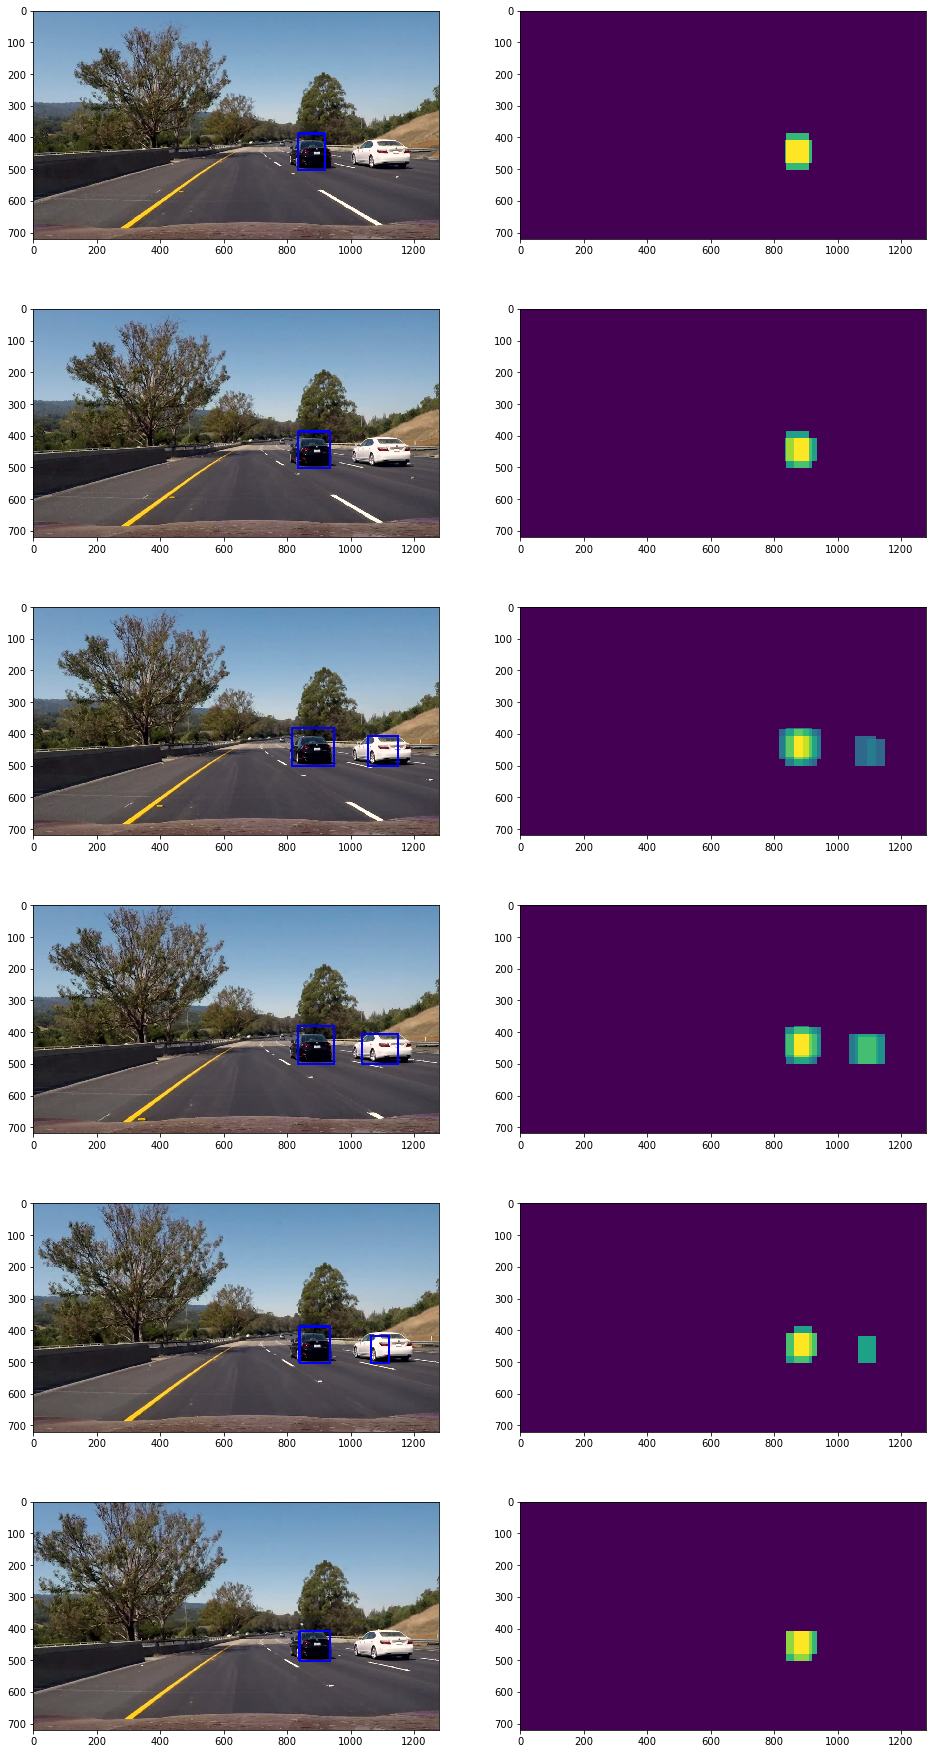

In [41]:
fg=plt.figure(figsize=(16,32))
#plt.imshow(draw_img_list[5])
for row in range(6):
    for col in range(2):
        if col==0:
            plt.subplot(6,2,2*row+col+1)
            plt.imshow(draw_img_list[row])
        else:
            plt.subplot(6,2,2*row+col+1)
            plt.imshow(heatmap_list[row])

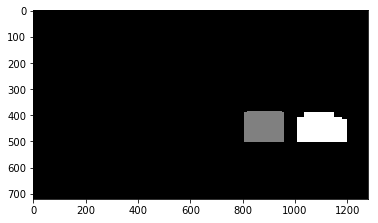

In [38]:
syn_frame_bboxes=[]
for i in range(6):
    syn_frame_bboxes.extend(total_bboxes_list[i])

heat = np.zeros_like(test_img_list[0][:,:,0]).astype(np.float)
# Add heat to each box in box list
total_heat = add_heat(heat,syn_frame_bboxes)
    
# Apply threshold to help remove false positives
total_heat = apply_threshold(total_heat,4)

# Visualize the heatmap when displaying    
total_heatmap = np.clip(total_heat, 0, 255)
#mpimg.imsave('./test_images/final_heatmap_test'+str(i+1)+'.jpg',heatmap_list[i])
# Find final boxes from heatmap using label function
total_labels = label(total_heatmap)
final_img=draw_labeled_bboxes(np.copy(test_img_list[0]), total_labels)
    #mpimg.imsave('./test_images/final_test'+str(i+1)+'.jpg',draw_img_list[i])
plt.imshow(total_labels[0],cmap='gray')

In [39]:
import numpy as np
import pickle
import cv2
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage.feature import hog
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from moviepy.editor import VideoFileClip
%matplotlib inline

with open('data.pickle','rb') as f:
    data=pickle.load(f)
svc=data['clf']
feat_scaler=data['scaler']

def get_hog_features(img,orient=9,pixels=8,cells=2,vis=True,feature_vec=True):   
    if vis:
        hog_features,hog_img = hog(img,orientations=orient,pixels_per_cell=(pixels,pixels),cells_per_block=(cells,cells),visualise=vis,transform_sqrt=True,feature_vector=feature_vec)
        return hog_features, hog_img
    else:
        hog_features = hog(img,orientations=orient,pixels_per_cell=(pixels,pixels),cells_per_block=(cells,cells),visualise=vis,transform_sqrt=True,feature_vector=feature_vec)
        return hog_features

def bin_spatial(img, size=(32,32)):
    return cv2.resize(img, size).ravel()
    
def color_hist(img, nbins=32, bins_range=(0,256)):
    ch1_hist=np.histogram(img[:,:,0], bins=nbins, range=bins_range)
    ch2_hist=np.histogram(img[:,:,1], bins=nbins, range=bins_range)
    ch3_hist=np.histogram(img[:,:,2], bins=nbins, range=bins_range)
    hist_features = np.concatenate((ch1_hist[0],ch2_hist[0],ch3_hist[0]))
    return hist_features

def draw_boxes(img, bboxes, color=(0,0,255),thick=6):
    img_copy=np.copy(img)
    for bbox in bboxes:
        cv2.rectangle(img_copy,bbox[0],bbox[1],color,thick)
    return img_copy

def convert_color(img, conv='RGB2YCrCb'):
    if conv == 'RGB2YCrCb':
        return cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    if conv == 'BGR2YCrCb':
        return cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
    if conv == 'RGB2LUV':
        return cv2.cvtColor(img, cv2.COLOR_RGB2LUV)

# Define a single function that can extract features using hog sub-sampling and make predictions
def find_cars(img, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins):
    car_bboxes=[]
    draw_img = np.copy(img)
    img = img.astype(np.float32)/255
    
    img_tosearch = img[ystart:ystop,:,:]
    ctrans_tosearch = convert_color(img_tosearch, conv='RGB2YCrCb')
    if scale != 1:
        imshape = ctrans_tosearch.shape
        ctrans_tosearch = cv2.resize(ctrans_tosearch, (np.int(imshape[1]/scale), np.int(imshape[0]/scale)))
        
    ch1 = ctrans_tosearch[:,:,0]
    ch2 = ctrans_tosearch[:,:,1]
    ch3 = ctrans_tosearch[:,:,2]

    # Define blocks and steps as above
    nxblocks = (ch1.shape[1] // pix_per_cell) - cell_per_block + 1
    nyblocks = (ch1.shape[0] // pix_per_cell) - cell_per_block + 1 
    nfeat_per_block = orient*cell_per_block**2
    
    # 64 was the orginal sampling rate, with 8 cells and 8 pix per cell
    window = 64
    nblocks_per_window = (window // pix_per_cell) - cell_per_block + 1
    cells_per_step = 2  # Instead of overlap, define how many cells to step
    nxsteps = (nxblocks - nblocks_per_window) // cells_per_step
    nysteps = (nyblocks - nblocks_per_window) // cells_per_step
    
    # Compute individual channel HOG features for the entire image
    hog1 = get_hog_features(ch1, orient, pix_per_cell, cell_per_block, vis=False,feature_vec=False)
    hog2 = get_hog_features(ch2, orient, pix_per_cell, cell_per_block, vis=False,feature_vec=False)
    hog3 = get_hog_features(ch3, orient, pix_per_cell, cell_per_block, vis=False,feature_vec=False)

    for xb in range(nxsteps):
        for yb in range(nysteps):
            ypos = yb*cells_per_step
            xpos = xb*cells_per_step
            # Extract HOG for this patch
            hog_feat1 = hog1[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_feat2 = hog2[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_feat3 = hog3[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_features = np.hstack((hog_feat1, hog_feat2, hog_feat3))

            xleft = xpos*pix_per_cell
            ytop = ypos*pix_per_cell

            # Extract the image patch
            subimg = cv2.resize(ctrans_tosearch[ytop:ytop+window, xleft:xleft+window], (64,64))
          
            # Get color features
            spatial_features = bin_spatial(subimg, size=spatial_size)
            hist_features = color_hist(subimg, nbins=hist_bins)

            # Scale features and make a prediction
            test_features = X_scaler.transform(np.hstack((spatial_features, hist_features, hog_features)).reshape(1, -1))    
            #test_features = X_scaler.transform(np.hstack((shape_feat, hist_feat)).reshape(1, -1))    
            test_prediction = svc.predict(test_features)
            
            if test_prediction == 1:
                xbox_left = np.int(xleft*scale)
                ytop_draw = np.int(ytop*scale)
                win_draw = np.int(window*scale)
                cv2.rectangle(draw_img,(xbox_left, ytop_draw+ystart),(xbox_left+win_draw,ytop_draw+win_draw+ystart),(0,0,255),6) 
                car_bboxes.append(((xbox_left, ytop_draw+ystart),(xbox_left+win_draw,ytop_draw+win_draw+ystart)))
    return draw_img, car_bboxes

from scipy.ndimage.measurements import label

def add_heat(heatmap, bbox_list):
    # Iterate through list of bboxes
    for box in bbox_list:
        # Add += 1 for all pixels inside each bbox
        # Assuming each "box" takes the form ((x1, y1), (x2, y2))
        if box!=[]:
            heatmap[box[0][1]:box[1][1], box[0][0]:box[1][0]] += 1
    # Return updated heatmap
    return heatmap# Iterate through list of bboxes
    
def apply_threshold(heatmap, threshold):
    # Zero out pixels below the threshold
    heatmap[heatmap < threshold] = 0
    # Return thresholded map
    return heatmap

def draw_labeled_bboxes(img, labels):
    # Iterate through all detected cars
    for car_number in range(1, labels[1]+1):
        # Find pixels with each car_number label value
        nonzero = (labels[0] == car_number).nonzero()
        # Identify x and y values of those pixels
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        # Define a bounding box based on min/max x and y
        bbox = ((np.min(nonzerox), np.min(nonzeroy)), (np.max(nonzerox), np.max(nonzeroy)))
        # Draw the box on the image
        cv2.rectangle(img, bbox[0], bbox[1], (0,0,255), 6)
    # Return the image
    return img

def process_image(img):
    scale_image,car_bound_boxes=find_cars(img, ystart=int(img.shape[0]/2), ystop=img.shape[0], scale=1.5, svc=svc, X_scaler=feat_scaler, orient=8, pix_per_cell=8, cell_per_block=2, spatial_size=(32,32), hist_bins=32)
    scale_image,car_bound_boxes_1=find_cars(img, ystart=int(img.shape[0]/2), ystop=img.shape[0], scale=1.8, svc=svc, X_scaler=feat_scaler, orient=8, pix_per_cell=8, cell_per_block=2, spatial_size=(32,32), hist_bins=32)
    car_bound_boxes.extend(car_bound_boxes_1)
    heat = np.zeros_like(img[:,:,0]).astype(np.float)
    # Add heat to each box in box list
    heat = add_heat(heat,car_bound_boxes)
    
    # Apply threshold to help remove false positives
    heat = apply_threshold(heat,3)

    # Visualize the heatmap when displaying    
    heatmap = np.clip(heat, 0, 255)

    # Find final boxes from heatmap using label function
    labels = label(heatmap)
    result_img = draw_labeled_bboxes(img, labels)
    return result_img
video_output = "./project_video_output.mp4"
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
#clip1 = VideoFileClip("../project_video.mp4").subclip(0,35)
clip1 = VideoFileClip("./project_video.mp4")
white_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time white_clip.write_videofile(video_output, audio=False)

[MoviePy] >>>> Building video ./project_video_output.mp4
[MoviePy] Writing video ./project_video_output.mp4


100%|█████████▉| 1260/1261 [24:11<00:01,  1.12s/it]


[MoviePy] Done.
[MoviePy] >>>> Video ready: ./project_video_output.mp4 

CPU times: user 23min 13s, sys: 1min 5s, total: 24min 18s
Wall time: 24min 13s
